In [173]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [174]:
import scipy
from scipy.stats import norm

In [175]:
stock='AXISBANK.NS'
data = yf.download(stock,'2005-01-01','2023-05-05')

[*********************100%***********************]  1 of 1 completed


In [176]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,37.000000,38.200001,37.000000,38.040001,32.853142,1421010
2005-01-04,38.220001,38.400002,37.400002,37.939999,32.766773,1115825
2005-01-05,37.990002,37.990002,35.509998,36.849998,31.825394,1163085
2005-01-06,36.820000,38.000000,35.400002,37.029999,31.980862,1192610
2005-01-07,36.130001,38.380001,36.130001,38.020000,32.835880,1530260
...,...,...,...,...,...,...
2023-04-27,888.000000,890.000000,877.500000,881.400024,879.590515,15992383
2023-04-28,885.099976,890.049988,853.650024,860.000000,858.234375,23004117
2023-05-02,870.000000,876.400024,864.250000,870.650024,868.862549,12947953


In [177]:
# data = data[:4000]

In [178]:
returns = np.diff(data['Adj Close'])
returns=-returns

In [179]:
data.shape,returns.shape

((4525, 6), (4524,))

In [180]:
returns.shape

(4524,)

In [181]:
np.sum(returns)

-831.3190383911133

In [182]:
data['Adj Close']

Date
2005-01-03     32.853142
2005-01-04     32.766773
2005-01-05     31.825394
2005-01-06     31.980862
2005-01-07     32.835880
                 ...    
2023-04-27    879.590515
2023-04-28    858.234375
2023-05-02    868.862549
2023-05-03    858.084717
2023-05-04    864.172180
Name: Adj Close, Length: 4525, dtype: float64

In [183]:
mean = np.mean(returns)
std_dev = np.std(returns)
mean,std_dev

(-0.18375752395913203, 8.991497333374573)

In [184]:
pip install KDEpy

In [185]:
import KDEpy

In [186]:
np.array(returns)

array([  0.08636856,   0.94137955,  -0.15546799, ..., -10.62817383,
        10.77783203,  -6.08746338])

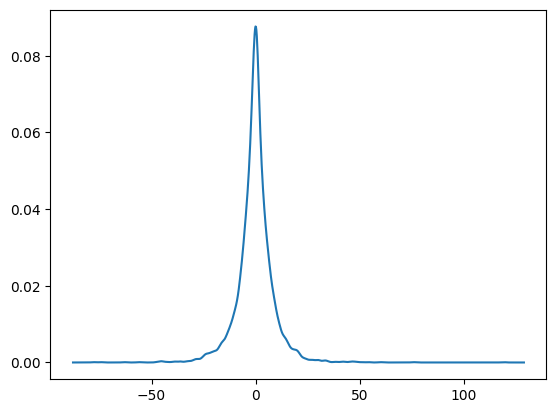

In [187]:
from KDEpy import FFTKDE
import matplotlib.pyplot as plt
x, y = FFTKDE(kernel="gaussian",bw = "silverman").fit(np.array(returns)).evaluate()
plt.plot(x, y)



In [188]:
np.array(data['Adj Close'])

array([ 32.85314178,  32.76677322,  31.82539368, ..., 868.86254883,
       858.0847168 , 864.17218018])

In [189]:
y


array([2.22044605e-16, 2.22044605e-16, 2.22044605e-16, ...,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16])

In [190]:
np.sum(y)

4.721854291239661

In [191]:
np.sort(np.array(returns))

array([-77.87487793, -74.39697266, -63.17367554, ...,  59.98510742,
        75.82830811, 119.07342529])

In [192]:
import torch
import torch.nn as nn


In [193]:
class QuantileLoss(nn.Module):
    def __init__(self, quantile):
        super(QuantileLoss, self).__init__()
        self.quantile = quantile

    def forward(self, predictions, targets):
        errors = targets - predictions
        quantile_loss = torch.max((self.quantile - 1) * errors, self.quantile * errors)
        return quantile_loss.mean()

In [194]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size,dtype=torch.float64)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size,dtype=torch.float64)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

In [195]:
network = NeuralNetwork(1,5,1)
quantile_loss = QuantileLoss(0.95)

In [196]:
optimizer = torch.optim.SGD(network.parameters(),lr=0.001)
input = np.array(data['Adj Close'])
input=input[0:-1]
input=torch.from_numpy(input)
input= torch.unsqueeze(input, dim=1)
returns=torch.from_numpy(returns)
returns=torch.unsqueeze(returns,dim=1)

In [197]:
for epoch in range(100000):
    outputs = network(input)
    loss = quantile_loss(outputs, returns)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 1000== 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

Epoch: 1000, Loss: 0.9997848991430102
Epoch: 2000, Loss: 0.9522898365424473
Epoch: 3000, Loss: 0.9405332232672735
Epoch: 4000, Loss: 0.925930541554031
Epoch: 5000, Loss: 0.924274119605489
Epoch: 6000, Loss: 0.9234677246247699
Epoch: 7000, Loss: 0.9220448460490047
Epoch: 8000, Loss: 0.9173951372063675
Epoch: 9000, Loss: 0.9161868976420952
Epoch: 10000, Loss: 0.915070478343809
Epoch: 11000, Loss: 0.914011036892818
Epoch: 12000, Loss: 0.9130036261515488
Epoch: 13000, Loss: 0.9120801517505396
Epoch: 14000, Loss: 0.9112111296510907
Epoch: 15000, Loss: 0.9104013368875429
Epoch: 16000, Loss: 0.909652588605899
Epoch: 17000, Loss: 0.9089349013857141
Epoch: 18000, Loss: 0.908381398176165
Epoch: 19000, Loss: 0.9077740150333774
Epoch: 20000, Loss: 0.9072464305261069
Epoch: 21000, Loss: 0.9067556078410445
Epoch: 22000, Loss: 0.9062826446597306
Epoch: 23000, Loss: 0.9058171569060898
Epoch: 24000, Loss: 0.9054051069960178
Epoch: 25000, Loss: 0.904841980520804
Epoch: 26000, Loss: 0.9044586958588198
Ep

In [198]:
outputs=network(input)
ans=outputs.detach().numpy()
ans.shape
x=np.arange(ans.shape[0])
x

array([   0,    1,    2, ..., 4521, 4522, 4523])

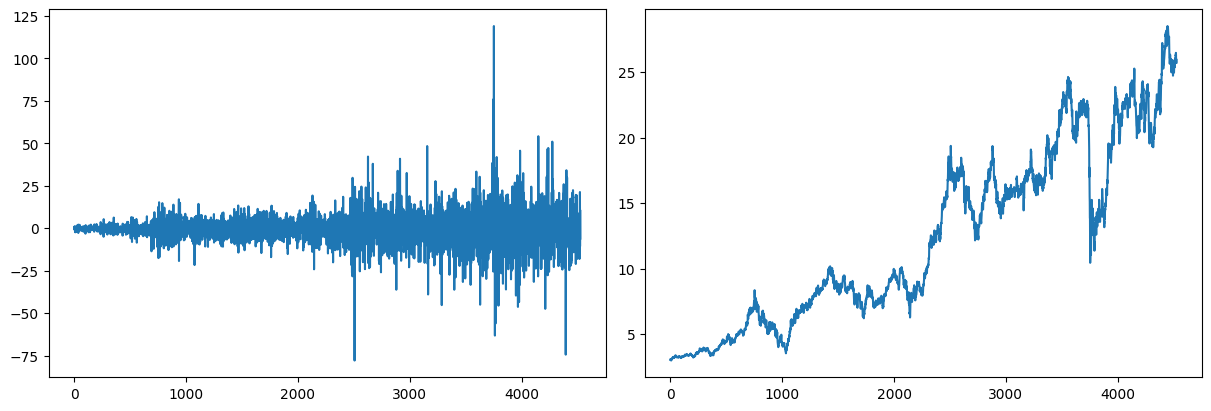

In [199]:
fig,(ax1,ax2)=plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
ax1.plot(returns)
ax2.plot(ans)